<a href="https://colab.research.google.com/github/cartmarsh/MachineLearning1/blob/main/RNN_Toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [8]:
import os

In [9]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [12]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 99% 52.0M/52.6M [00:03<00:00, 25.2MB/s]
100% 52.6M/52.6M [00:03<00:00, 16.9MB/s]


In [13]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [16]:
import pandas as pd

In [17]:
raw_df = pd.read_csv("data/train.csv.zip")
test_df = pd.read_csv("data/test.csv.zip")
sub_df = pd.read_csv("data/sample_submission.csv.zip")

In [19]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [20]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [21]:
raw_df.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
102458,244af0f46a0fdfcb,Charlie Bruce \n\nHi Michig... I noticed your ...,0,0,0,0,0,0
62674,a7b4dba1437a1ec7,"Ok, I'll respond to that after I'm unblocked. ...",0,0,0,0,0,0
123278,937032483f8d2600,WP:ITN/C \n\nCould you make some comments on t...,0,0,0,0,0,0
128856,b11c628f02309d78,I'm not engaging with him (or her - I'm not su...,0,0,0,0,0,0
20300,359ec4384511e06b,"""\n\nHey SLJ, could see if might want to help ...",0,0,0,0,0,0
41369,6e5417c3c9eb8f5d,"""\n\n Format drift corrections \n\nHi. After v...",0,0,0,0,0,0
97704,0ab7bdc86e64a84b,This article is about as far from meeting the ...,0,0,0,0,0,0
51912,8af327949c7e2488,"""\n Image:AF IITYECYM.jpg \nThanks for uploadi...",0,0,0,0,0,0
104492,2f08a885faea319e,I HATE WIKIPEDIA I HATE WIKIPEDIA I HATE WIKIP...,1,0,0,0,0,0
49924,8580b7febe76daf8,"""This file is an archive - please do not add n...",0,0,0,0,0,0


In [22]:
target_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [23]:
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [24]:
for col in target_cols:
  print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [25]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [26]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [27]:
from torchtext.data.utils import get_tokenizer

In [28]:
tokenizer = get_tokenizer("basic_english")

In [30]:
sample_comment = raw_df.comment_text.values[0]

In [31]:
sample_comment_tokens = tokenizer(sample_comment)

In [33]:
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [34]:
from torchtext.vocab import build_vocab_from_iterator

In [36]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [37]:
VOCAB_SIZE = 1500

In [38]:
## for words that are unknown to the vocab
unk_token = "<unk>"

## to pad sentences, because we need the same length for RNNs
pad_token = "<pad>"

In [39]:
vocab = build_vocab_from_iterator(comment_tokens, specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [42]:
vocab.set_default_index(vocab[unk_token])

In [41]:
vocab["is"]

12

In [ ]:
vocab.lookup_indices(sample_comment_tokens)

### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

In [47]:
MAX_LENGTH = 150

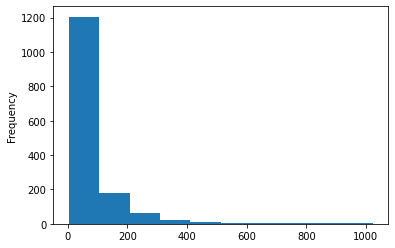

In [46]:
raw_df.comment_text.sample(1500).map(tokenizer).map(len).plot(kind="hist")

In [45]:
from torch.utils.data  import Dataset

In [53]:
def pad_tokens(tokens):
  if(len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token] *( MAX_LENGTH - len(tokens))

In [ ]:
pad_tokens(tokenizer("I love this shit so much i cannot fatom a world where this is not present or "))

In [ ]:
class JigsawDataset(Dataset):
  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test
    
  
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    input = torch.tensor(pad_tokens(tokenizer(comment_text)))

  def __len__(self):
    return len(self.df)

### Create PyTorch Dataloaders

## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

## Train and Evaluate the Model

## Make Predictions & Submit